#Kavish Nag
#24070126085
#AIML B1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import iris
df = sns.load_dataset("iris")

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
X = df.iloc[:,0:4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = df.iloc[:,4]
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
x_lda = lda.fit_transform(X, y)

In [ ]:
X.shape


(150, 4)

In [ ]:
y.shape

(150,)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
lda1= Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=1))
])

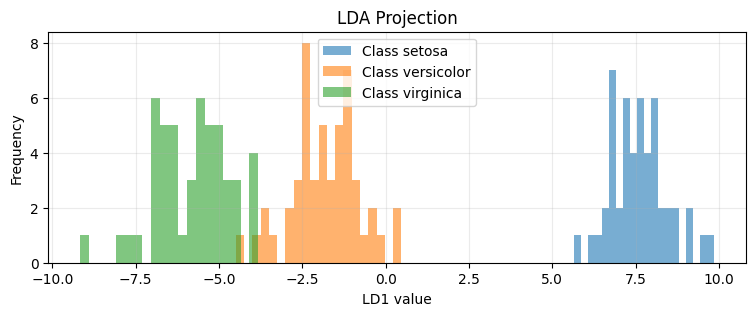

In [ ]:
class_name_map = {species: f'Class {species}' for species in np.unique(y)}
plt.figure(figsize=(9,3))
for cls in np.unique(y):
  plt.hist(x_lda[y==cls, 0], bins=20, alpha=0.6,label=class_name_map[cls])
plt.legend()
plt.xlabel("LD1 value")
plt.ylabel("Frequency")
plt.title("LDA Projection")
plt.grid(True,alpha=0.25)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying LDA on the training data
lda_new = LinearDiscriminantAnalysis(n_components=2)
lda_new.fit(X_train, y_train)

# Making predictions
y_pred = lda_new.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


#PCA

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA with 2 components
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)


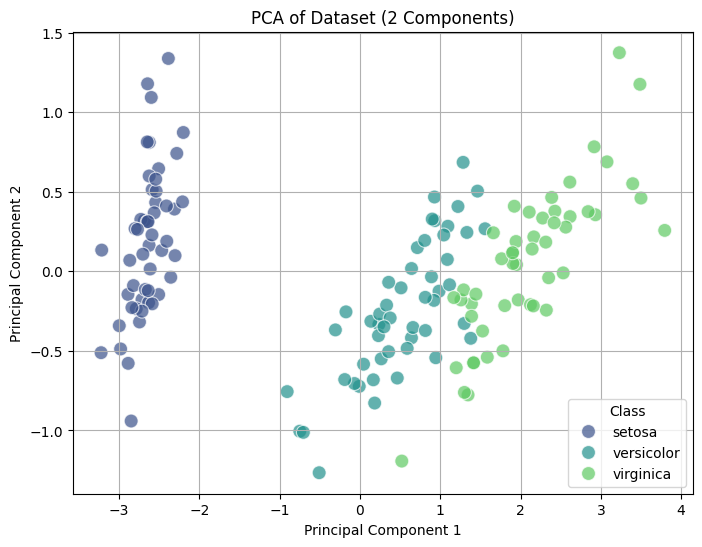

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for plotting PCA results
pca_df = pd.DataFrame(data=x_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Class'] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Class',palette='viridis', data=pca_df, s=100, alpha=0.7)
plt.title('PCA of Dataset (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Class')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Apply PCA on the training data
pca_new = PCA(n_components=1)
x_train_pca = pca_new.fit_transform(X_train)
x_test_pca = pca_new.transform(X_test)

classifier_pca = LogisticRegression(random_state=42)
classifier_pca.fit(x_train_pca, y_train)

y_pred_pca = classifier_pca.predict(x_test_pca)

print("Accuracy using PCA ", accuracy_score(y_test, y_pred_pca))

Accuracy using PCA  0.9666666666666667
